In [18]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot



#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier 
import graphviz
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [4]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

# Decision Tree

In [5]:
#imports
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  

In [6]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

#normalization
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled, columns=df.columns)

In [7]:
y = df.Legendary
X = df.drop(columns = "Legendary")



In [9]:
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

In [10]:
#functions for entropy 

def decisionTreeEntropy(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
  tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
  tree_clf.fit(X_train, y_train)
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  target_names = ['0','1']
  for train_index, test_index in kf.split(X):
      tree_clf.fit(X_train, y_train)  
      y_pred = tree_clf.predict(X_test)
      print(classification_report(y_test, y_pred, target_names=target_names))  
        
#Printing confusion tree
  confusion_mat = confusion_matrix(y_test, y_pred) 
  print(confusion_mat) 
  plot_confusion_matrix(confusion_mat, 2)
    
 #roc curve
  nb = GaussianNB()
  nb = nb.fit(X_train, y_train)
  y_probas = nb.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)

In [14]:
def decisionTreeGini(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
  tree_clf = DecisionTreeClassifier(max_depth=2, criterion = "gini", random_state=42)
  tree_clf.fit(X_train, y_train)
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  target_names = ['0','1']
  for train_index, test_index in kf.split(X):
      tree_clf.fit(X_train, y_train)  
      y_pred = tree_clf.predict(X_test)
      print(classification_report(y_test, y_pred, target_names=target_names))
 
#Printing confusion tree
  confusion_mat = confusion_matrix(y_test, y_pred) 
  print(confusion_mat) 
  plot_confusion_matrix(confusion_mat, 2)
    
#roc curve  
  nb = GaussianNB()
  nb = nb.fit(X_train, y_train)
  y_probas = nb.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)

In [22]:
def KnnClassifier(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)
    knn = KNeighborsClassifier(n_neighbors = 10) 
    knn.fit(X_train, y_train) 
    knn.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       420
           1       0.74      1.00      0.85        31

    accuracy                           0.98       451
   macro avg       0.87      0.99      0.92       451
weighted avg       0.98      0.98      0.98       451

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       420
           1       0.74      1.00      0.85        31

    accuracy                           0.98       451
   macro avg       0.87      0.99      0.92       451
weighted avg       0.98      0.98      0.98       451

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       420
           1       0.74      1.00      0.85        31

    accuracy                           0.98       451
   macro avg       0.87      0.99      0.92       451
weighted avg       0.98      0.98      0.98       451

              preci

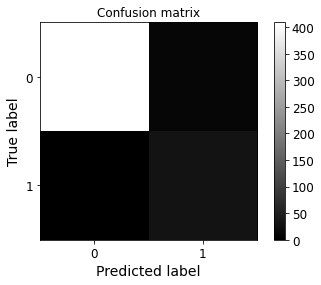

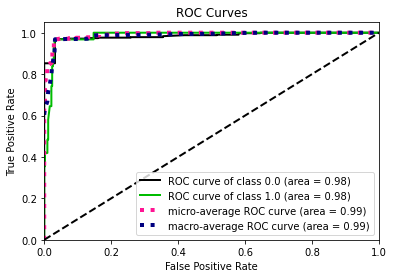

In [12]:
decisionTreeEntropy(X,y) 


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       416
           1       0.73      0.86      0.79        35

    accuracy                           0.96       451
   macro avg       0.86      0.92      0.89       451
weighted avg       0.97      0.96      0.97       451

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       416
           1       0.73      0.86      0.79        35

    accuracy                           0.96       451
   macro avg       0.86      0.92      0.89       451
weighted avg       0.97      0.96      0.97       451

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       416
           1       0.73      0.86      0.79        35

    accuracy                           0.96       451
   macro avg       0.86      0.92      0.89       451
weighted avg       0.97      0.96      0.97       451

              preci

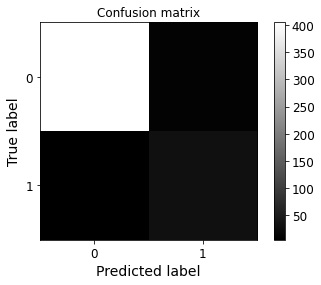

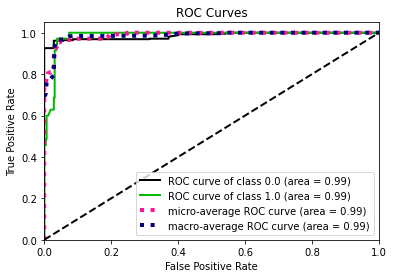

In [13]:
decisionTreeGini(X,y)

In [23]:
KnnClassifier(X,y)